## Background and Context

* AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

* A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

* You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective
* To predict whether a liability customer will buy a personal loan or not.
* Which variables are most significant.
* Which segment of customers should be targeted more.

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Importing Libraries

In [58]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Understanding

In [59]:
data = pd.read_csv('Loan_Modelling.csv')

In [60]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [61]:
#copying the data into another variable
df = data.copy()

In [62]:
df.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns

In [63]:
#Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* There are no missing values in the data
* All the datatypes are in the integer or float type 

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* The ID column adds little or no information to our dataset
* The average age is 45 years and the maximum is 67 years which makes sense
* The experience column has a negative value of -3 and this will need to be looked at. The average working experience is approximately 20 years.
* There is an annual income range from 8000 dollars to 224,000 dollars with an average annual income of ~224,000 dollars. The huge gap from the 75th pecentile to the maximum income indicates that there might be outliers present.
* The zipcode column will have to be looked at to see if any insights caqn be drawn from it
* The family column makes sence as the maximum number of people in a family is 4 with the minimum number being 1
* There is a huge gap in the CCAvg column between the 75th percentile and the maximum showing that there might be outliers
* There are some individuals that recorded a mortgage of zero meaning they so no have a mortgage


In [65]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* Confirming that there are no missing values

## Data Preprocessing

In [66]:
# Dropping the Id column
df.drop(['ID'],axis = 1, inplace = True)

In [67]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


* Earlier, we noticed that the experience column had negative values. We are going to look at the column and make the required corrections

In [68]:
# Checking the negative values in the the experience column
df[df['Experience']<0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [69]:
negative_experience = df[df['Experience'] < 0]['Experience']
unique_negative_values = negative_experience.unique()
value_counts = negative_experience.value_counts()

print("Unique Negative Values:", unique_negative_values)
print("Counts of Negative Values:")
print(value_counts)


Unique Negative Values: [-1 -2 -3]
Counts of Negative Values:
-1    33
-2    15
-3     4
Name: Experience, dtype: int64


In [70]:
# Convert negative 'Experience' values to positive
df['Experience'] = df['Experience'].abs()
df[df['Experience']<0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


* We are going to take a look at the zipcodes too and observe if we can get valuable insight from that column

In [71]:
df['ZIPCode'].head(10)

0    91107
1    90089
2    94720
3    94112
4    91330
5    92121
6    91711
7    93943
8    90089
9    93023
Name: ZIPCode, dtype: int64

In [72]:
df['ZIPCode'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [73]:
df['ZIPCode'].nunique()

467

* There are 467 unique values in the Zipcode column
* Every country has a specic reading for their zipcodes.For zipcodes in the US,the first digit represents a certain group/region of US states,the second and third digits together representing a region in that group(perhaps a large city) and the fourth and fifth representing a group of delivery addresses within that region
* We are going to limit them to the first two digits to reduce the number of unique values

In [74]:
df['ZIPCode'] = df['ZIPCode'].astype(str).str[:2]
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1


In [75]:
df['ZIPCode'].nunique()

7

* There are 7 unique values in the zipcode column

#### Scaling the Income,CCAvg, and Mortgage columns to thousands

* From the description given, the income,CCAvg, and mortgage columns are recorded in thousands of dollars hence we need to change them into figures of thousands

In [76]:
df['Income'] = df['Income'] * 1000
df['CCAvg'] = df['CCAvg'] * 1000
df['Mortgage'] = df['Mortgage'] * 1000

In [77]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49000,91,4,1600.0,1,0,0,1,0,0,0
1,45,19,34000,90,3,1500.0,1,0,0,1,0,0,0
2,39,15,11000,94,1,1000.0,1,0,0,0,0,0,0
3,35,9,100000,94,1,2700.0,2,0,0,0,0,0,0
4,35,8,45000,91,4,1000.0,2,0,0,0,0,0,1


## EDA

## Univariate Analysis

In [78]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [79]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [80]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [81]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49000,91,4,1600.0,1,0,0,1,0,0,0
1,45,19,34000,90,3,1500.0,1,0,0,1,0,0,0
2,39,15,11000,94,1,1000.0,1,0,0,0,0,0,0
3,35,9,100000,94,1,2700.0,2,0,0,0,0,0,0
4,35,8,45000,91,4,1000.0,2,0,0,0,0,0,1


### Age

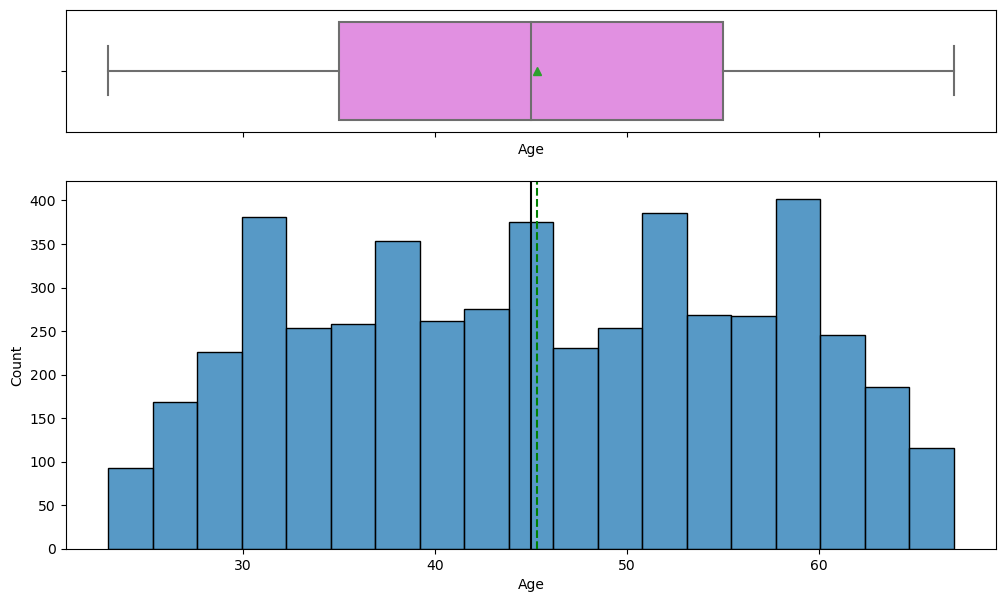

In [82]:
histogram_boxplot(df, "Age")

* The average age is approximately 45 years
* The distributions seems to be normal and symmetrical

### Experience

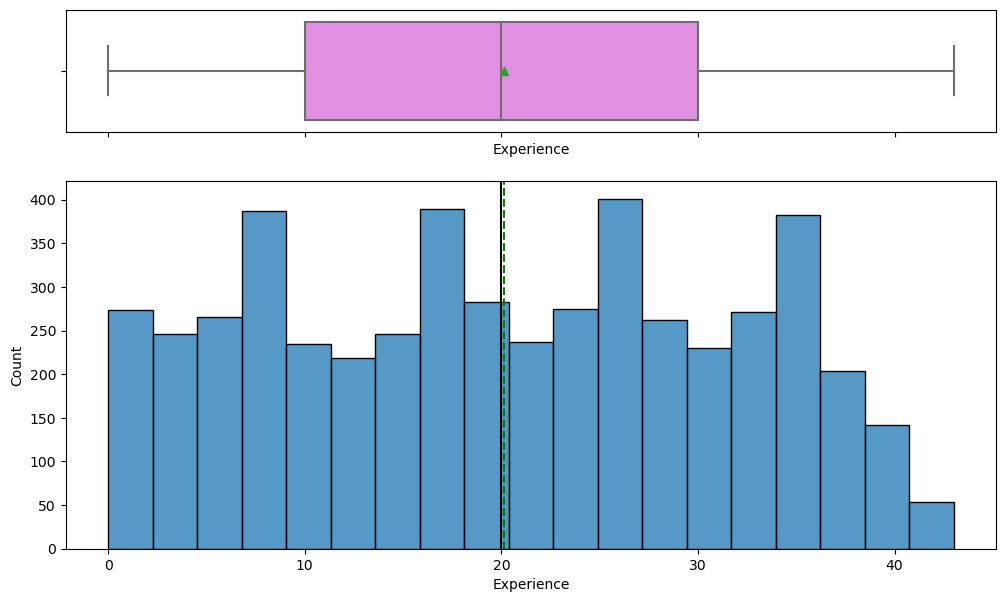

In [83]:
histogram_boxplot(df,'Experience')

* The average work experience is about 20 years
* A few people have over 40 years of experience
* The distribution is fairly symmetrical

### Income

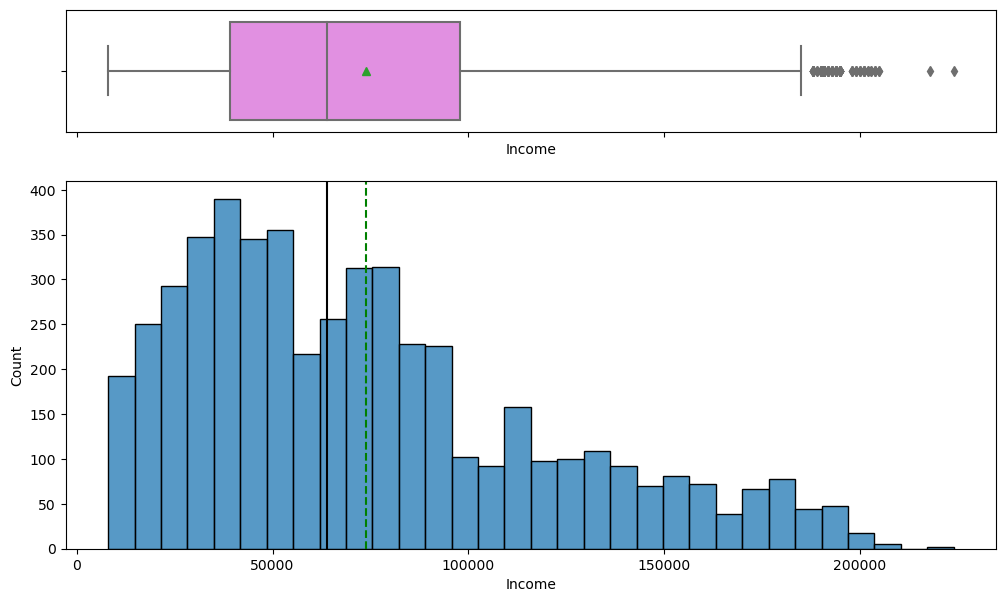

In [84]:
histogram_boxplot(df,'Income')

* The distribution is skewed to the right
* A few people have an annual income over 200k dollars

### Family

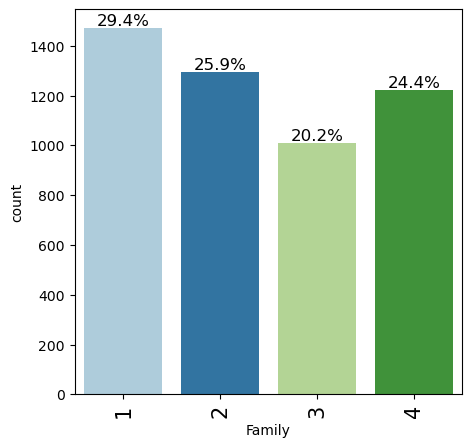

In [85]:
labeled_barplot(df, "Family", perc=True)

* Most of the customers live alone

### Zipcode

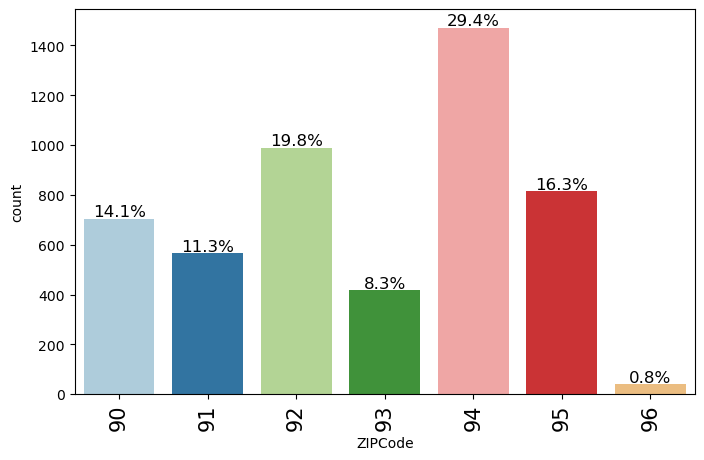

In [86]:
labeled_barplot(df,'ZIPCode',perc = True)

### CCAvg

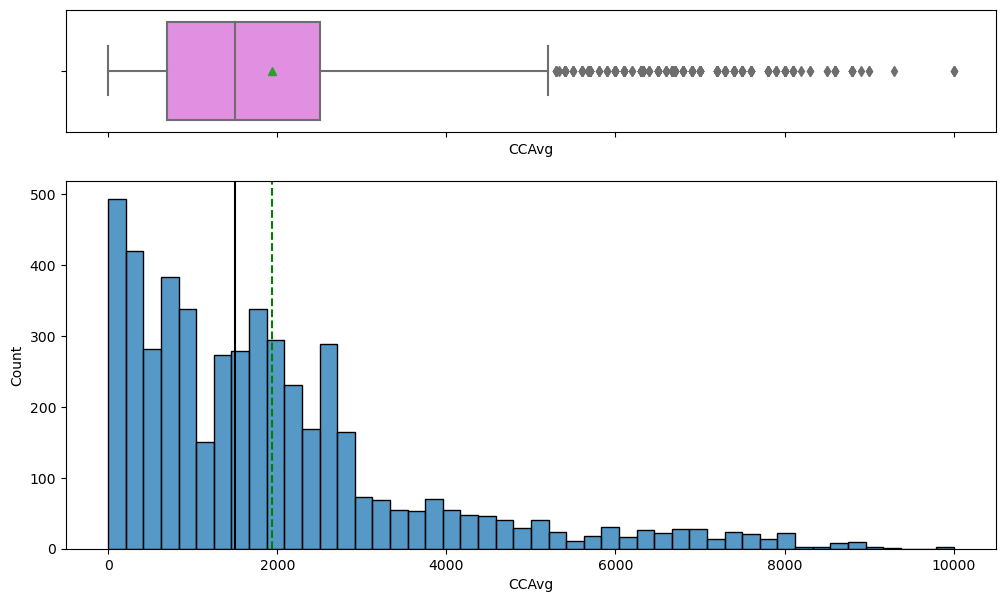

In [87]:
histogram_boxplot(df,'CCAvg')

* The distribution is heavily skewed to the right

### Education

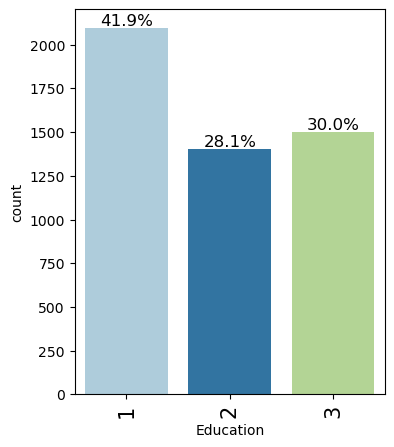

In [88]:
labeled_barplot(df,'Education',perc=True)

* ~42 percent of customers have an undergrad degree followed by those with a professional degree(30 percent)

### Mortgage

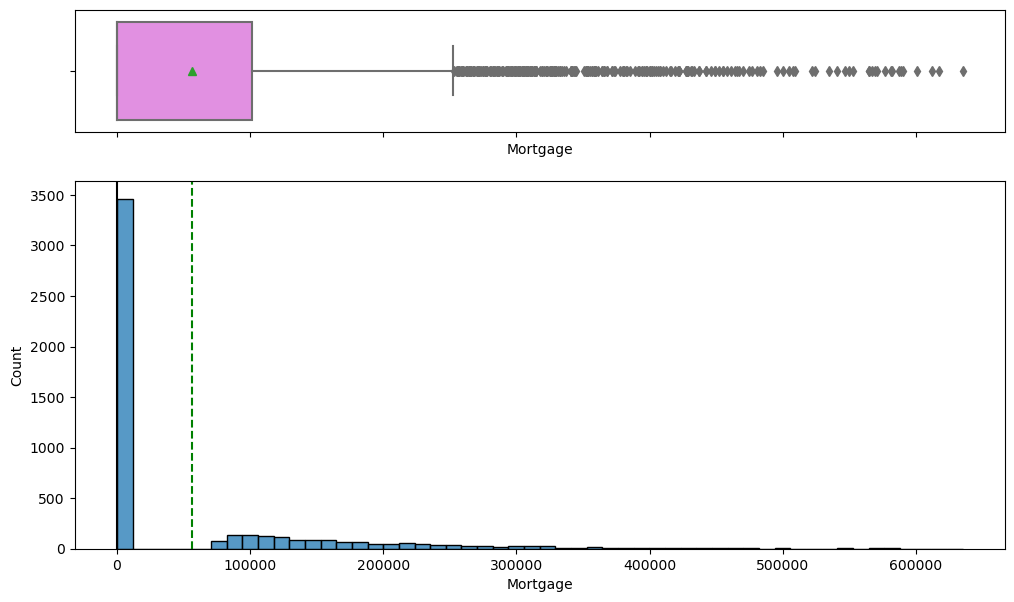

In [89]:
histogram_boxplot(df,'Mortgage')

* Most people do not have a mortgage
* There are many outliers

### Securities Account

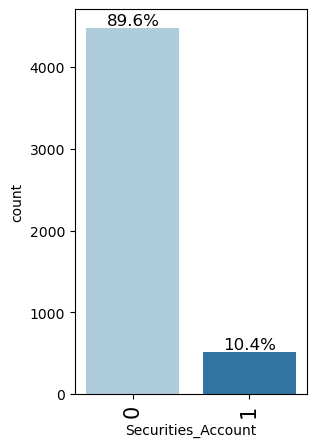

In [90]:
labeled_barplot(df, "Securities_Account", perc=True)

* ~90 percent do not have a securities account

### CD_Account

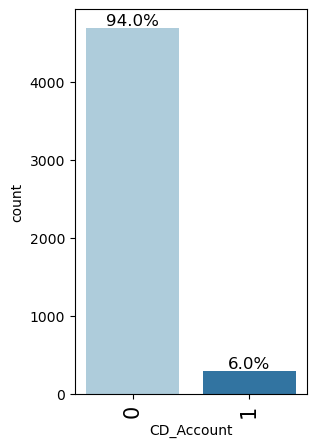

In [91]:
labeled_barplot(df, "CD_Account", perc=True)

* 94 percent of the customers dont have a certificate of deposit with the bank

### Online

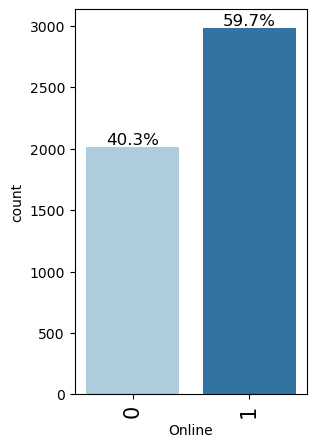

In [92]:
labeled_barplot(df, "Online", perc=True)

* ~60 percent of the customers use internet banking services while 40 percent do not

### Credit Card

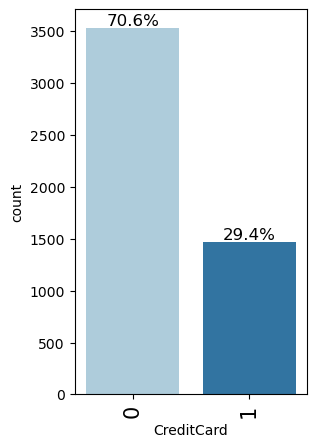

In [93]:
labeled_barplot(df, "CreditCard", perc=True)

* ~71 percent of the customers use credit cards while 29 percent do not use credit cards issued by the bank

## Bivariate Analysis

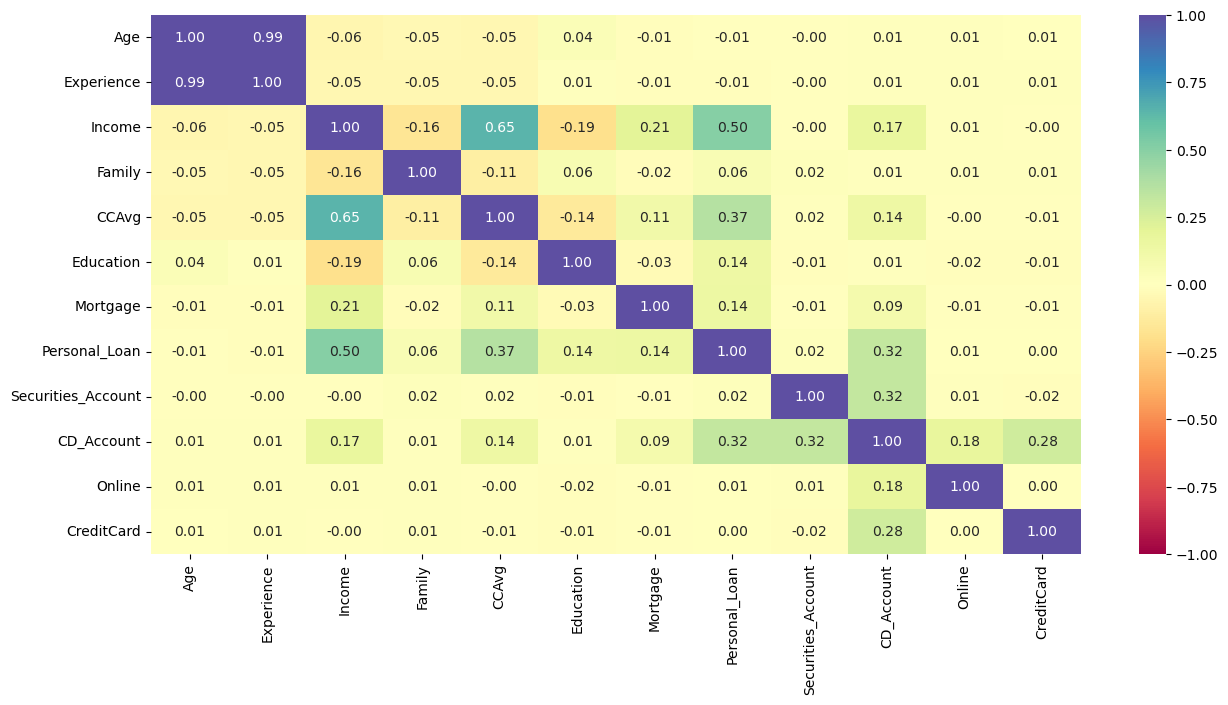

In [94]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Age and Experience are heavily correlated with a score of 0.99 which is close to a perfect correlation. As such we can drop one of them since they would both have the same effect on our model
* Income and CCAvg have a good correlation of 0.65. This makes sense as the higher ones icome, the higher the spending


### Age vs Experience

<Axes: xlabel='Age', ylabel='Experience'>

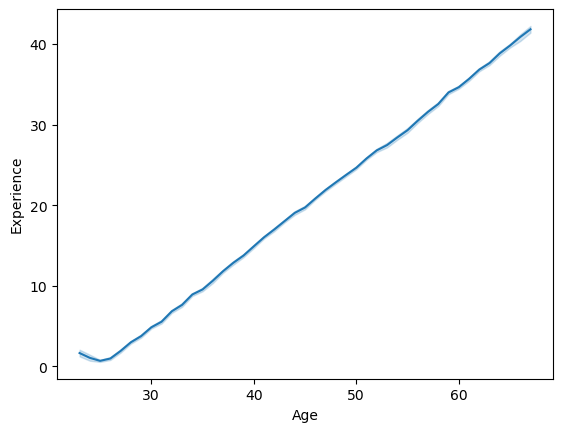

In [95]:
sns.lineplot(data=df,x='Age',y='Experience')

* Age and Experience have an almost perfect linear relationship

### Personal Loan Vs CCAvg

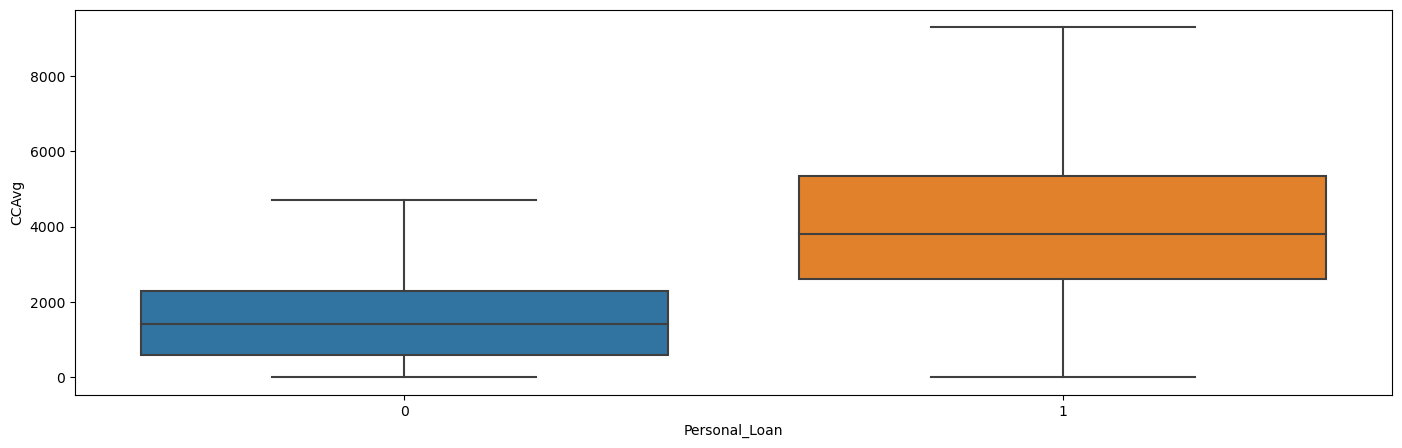

In [96]:
plt.figure(figsize=(17, 5))
sns.boxplot(x="Personal_Loan", y="CCAvg", data=df, showfliers = False)
plt.show()

* Customers that take personal loans have a high average monthly credit card spending

### Personal Loan Vs Income

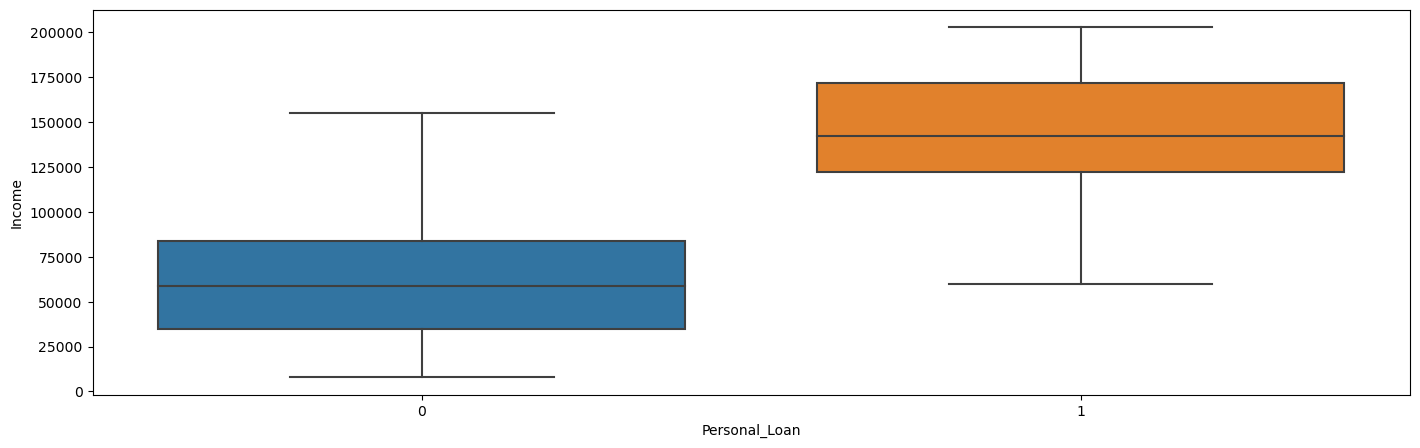

In [97]:
plt.figure(figsize=(17, 5))
sns.boxplot(x="Personal_Loan", y="Income", data=df, showfliers = False)
plt.show()

* Individuals with higher incomes tend to go for personal loans more

### Personal Loan vs Experience

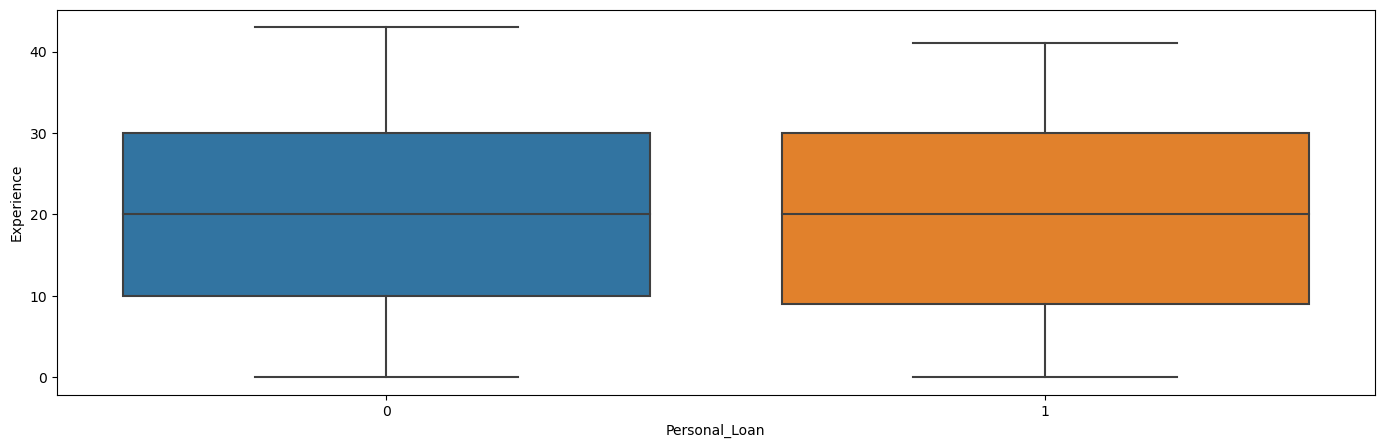

In [98]:
plt.figure(figsize=(17, 5))
sns.boxplot(x="Personal_Loan", y="Experience", data=df, showfliers = False)
plt.show()

* There's no difference in the years of experience of customers who took Personal Loan and those who did not

### Personal_Loan vs ZIPCode

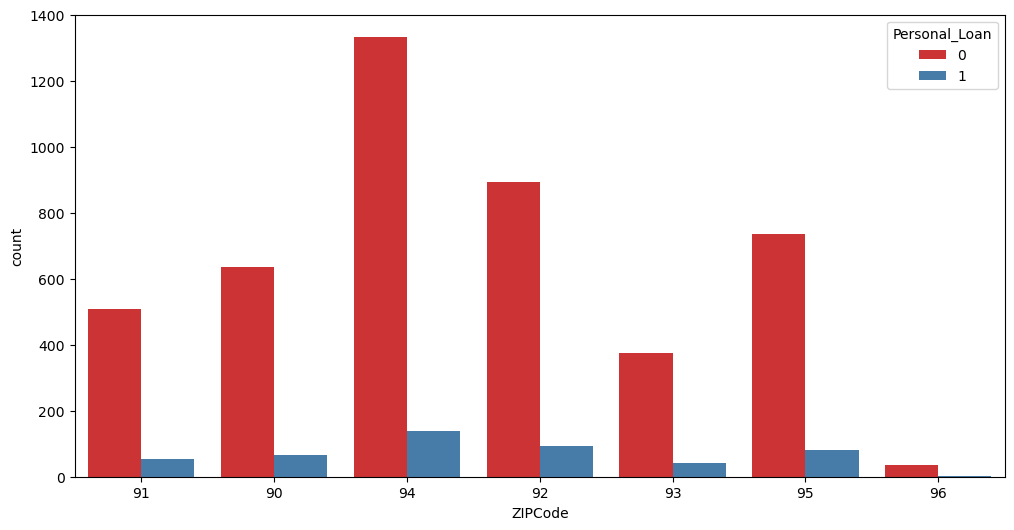

In [99]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ZIPCode', hue='Personal_Loan', data=df, palette='Set1')
plt.show()

* sub region 94 has both the highest loan acceptance as well as no persoanal oan rate

### Personal loan vs CCAvg

<Axes: xlabel='Personal_Loan', ylabel='CCAvg'>

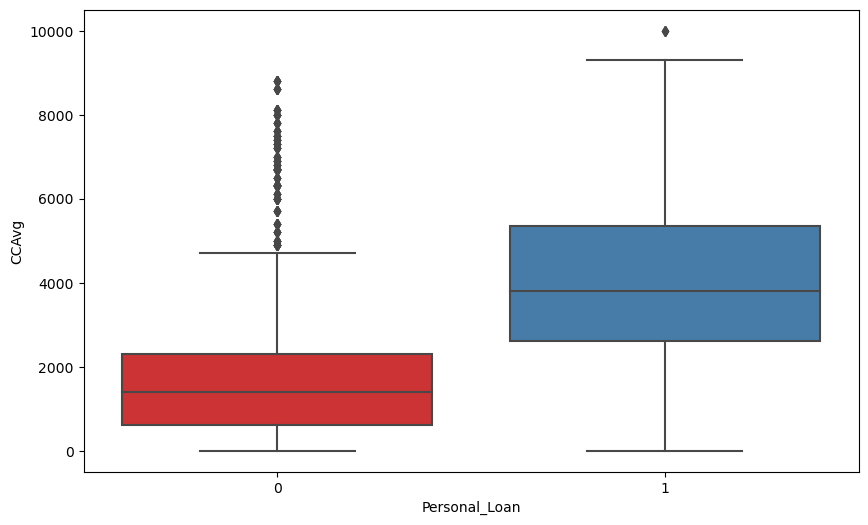

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='CCAvg', data=df, palette='Set1')

* Individuals with higher credit card averages tend to go for loans more

<Axes: xlabel='Income', ylabel='CCAvg'>

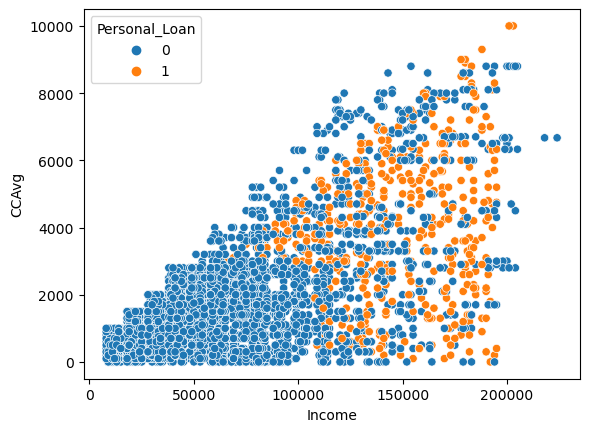

In [101]:
sns.scatterplot(data=df,x='Income',y='CCAvg',hue='Personal_Loan')

* Increasing income shows an increase in the credit card average whichthen shows an increase in loan acceptance

### Personal Loan vs Education

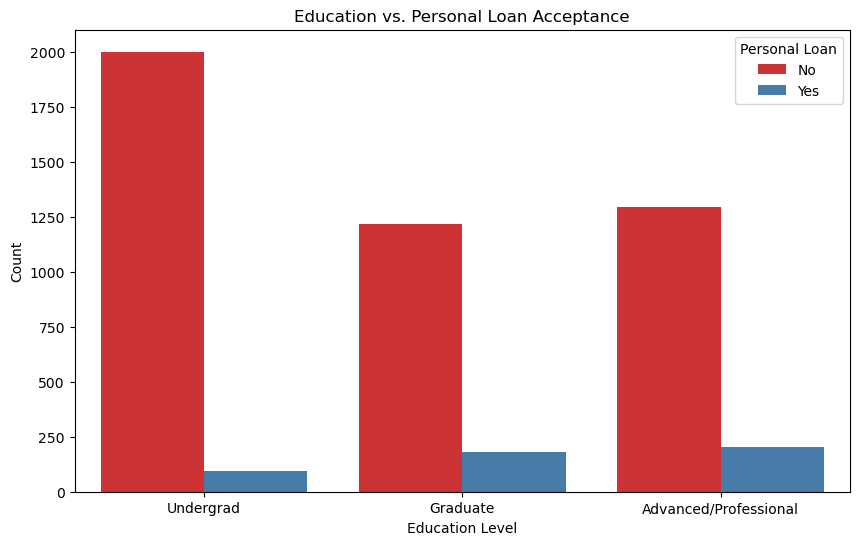

In [102]:
# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=df, palette='Set1')
plt.title("Education vs. Personal Loan Acceptance")
plt.xlabel("Education Level")
plt.ylabel("Count")

# Show the plot
plt.xticks([0, 1, 2], ['Undergrad', 'Graduate', 'Advanced/Professional'])
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()


* Undergrads have the least need for personal loans while Pprofessionals have the most need

### Personal Loan vs CD_Account

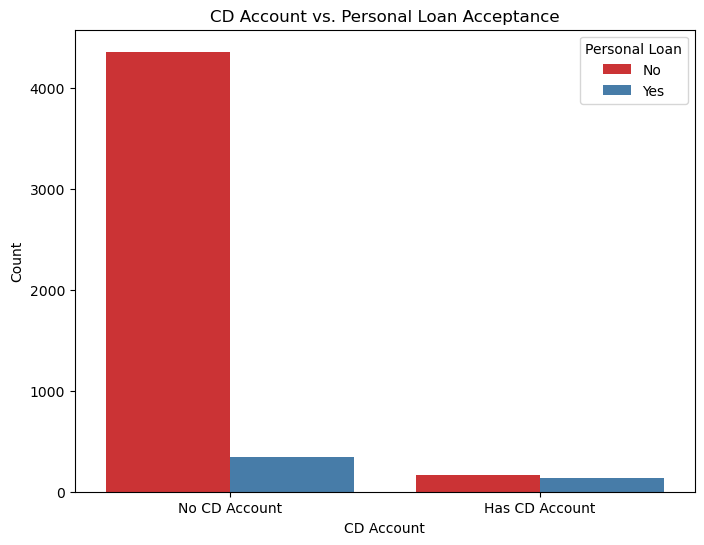

In [103]:
# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='CD_Account', hue='Personal_Loan', data=df, palette='Set1')
plt.title("CD Account vs. Personal Loan Acceptance")
plt.xlabel("CD Account")
plt.ylabel("Count")

# Show the plot
plt.xticks([0, 1], ['No CD Account', 'Has CD Account'])
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

* Most individuals without a certificate of deposit account have a personal loan

## Dealing with Outliers

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.1346,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73774.2000,46033.729321,8000.0,39000.0,64000.0,98000.0,224000.0
Family,5000.0,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1937.9380,1747.658980,0.0,700.0,1500.0,2500.0,10000.0
Education,5000.0,1.8810,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56498.8000,101713.802102,0.0,0.0,0.0,101000.0,635000.0
Personal_Loan,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.1044,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.0604,0.238250,0.0,0.0,0.0,0.0,1.0


In [105]:
df1 = df.copy()

In [106]:
df1.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49000,91,4,1600.0,1,0,0,1,0,0,0
1,45,19,34000,90,3,1500.0,1,0,0,1,0,0,0
2,39,15,11000,94,1,1000.0,1,0,0,0,0,0,0
3,35,9,100000,94,1,2700.0,2,0,0,0,0,0,0
4,35,8,45000,91,4,1000.0,2,0,0,0,0,0,1


In [107]:

# Define the outlier threshold (e.g., 1.5 times the interquartile range)
threshold = 1.5

# Create a DataFrame to store outlier percentages
outlier_percentages = pd.DataFrame(columns=['Column', 'Percentage of Outliers'])

for column_name in df1.columns:
    # Skip non-numeric columns
    if df1[column_name].dtype not in [int, float]:
        continue
    
    # Calculate the first and third quartiles
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Count the number of outliers
    outliers = df1[(df1[column_name] < lower_bound) | (df1[column_name] > upper_bound)]
    
    # Calculate the percentage of outliers
    percentage_outliers = (len(outliers) / len(df1)) * 100
    
    # Append the result to the DataFrame
    outlier_percentages = outlier_percentages.append({'Column': column_name, 'Percentage of Outliers': percentage_outliers}, ignore_index=True)

# Display the DataFrame of outlier percentages
print(outlier_percentages)


  Column  Percentage of Outliers
0  CCAvg                    6.48


In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   object 
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


In [109]:
# Calculate the first and third quartiles
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR


In [110]:
# Define the outlier threshold 
threshold = 1.5

# Select numeric columns
numeric_columns = data.select_dtypes(include=["float64", "int64"])

# Calculate the first quartile (Q1) and third quartile (Q3) for each numeric column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calculate the interquartile range (IQR) for each column
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers for each numeric column
outliers = (
    (numeric_columns < lower_bound)
    | (numeric_columns > upper_bound)
)

# Calculate the percentage of outliers for each column
percentage_outliers = outliers.sum() / len(data) * 100

# Create a DataFrame to present the results
outlier_percentages_df = pd.DataFrame({
    'Column': percentage_outliers.index,
    'Percentage of Outliers': percentage_outliers.values
})

# Display the DataFrame of outlier percentages
print(outlier_percentages_df)


                Column  Percentage of Outliers
0                   ID                    0.00
1                  Age                    0.00
2           Experience                    0.00
3               Income                    1.92
4              ZIPCode                    0.00
5               Family                    0.00
6                CCAvg                    6.48
7            Education                    0.00
8             Mortgage                    5.82
9        Personal_Loan                    9.60
10  Securities_Account                   10.44
11          CD_Account                    6.04
12              Online                    0.00
13          CreditCard                    0.00


## Outlier Summary

* We are not going to treat these outliers as they could affect the accuracy of our model since the underlying factors causing these outliers seem to make sense in real life scenarios

## Data Preparation

In [111]:
# Dropping the xperience column as it correlates perfectly with age
X = df1.drop(["Personal_Loan", "Experience"], axis=1)
Y = df1['Personal_Loan']

X = pd.get_dummies(X, columns=["ZIPCode"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
#df1.info()

In [112]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 16)
Shape of test set :  (1500, 16)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Functions

In [113]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [115]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


## Logistic Regression

In [116]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
lg_model = lg.fit(X_train, y_train)

## Checking model performance on the training set

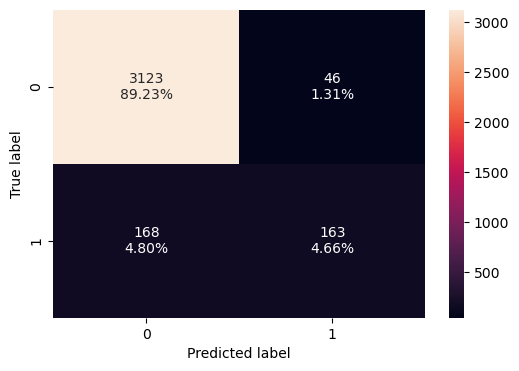

In [117]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [118]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.938857,0.492447,0.779904,0.603704


## ROC-AUC

* The area under the ROC curve (AUC) is a measure of how good a model is - The higher the AUC, the better the model is, at distinguishing between classes.

1. predict_proba
Predicts the probabilities for the class 0 and 1.

Input: Train or test data

Output: Returns the predicted probabilities for class 0 and 1

2. roc_curve_score
Returns the auc scores

Input: 1. Training data 2. Predicted Probability

Output: AUC scores between 0 and 1

3. roc_curve
Returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.

Input: 1. Training data 2. Predicted Probability

Output: False positive rate, true positive rate and threshold values

* ROC-AUC on training set

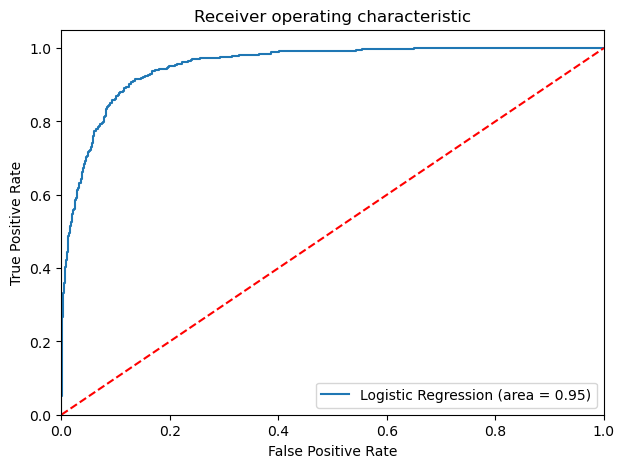

In [119]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.
* ROC-AUC score of 0.96 on training is quite good.

## Model Performance Improvement

* Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.
* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [120]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.11826787515160377


## Checking model performance on the training set

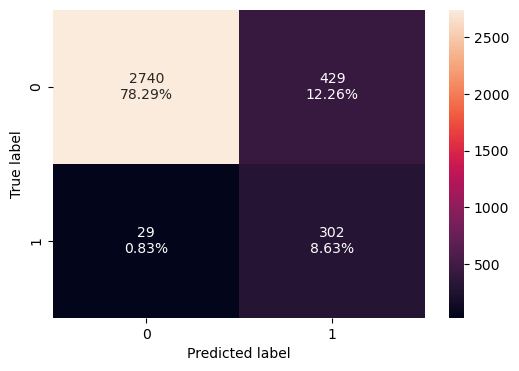

In [121]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [122]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.869143,0.912387,0.413133,0.568738


* Model performance has improved significantly on training set.
* Model is giving a recall of 0.91 on the training set but precision has gone down,but this not right because it will lead to loss of resources, we need to choose an optimal balance between recall and precision.

###  Let's use Precision-Recall curve and see if we can find a better threshold

The Precision-Recall curve shows the tradeoff between Precision and Recall for different thresholds. It can be used to select optimal threshold as required to improve the model improvement.

precision_recall_curve()
Returns the fpr, tpr and threshold values

Input: 1. Original data 2. Predicted Probability

Output: False positive rate, true positive rate and threshold values

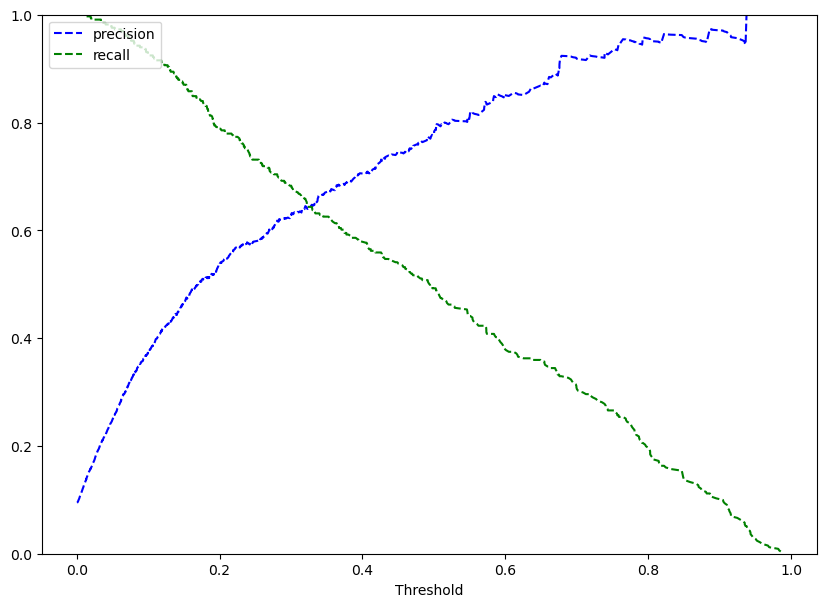

In [123]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


# Plot recall precision curve
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.34 we get a higher recall and a good precision.

In [124]:
# setting the threshold
optimal_threshold_curve = 0.34

## Checking model performance on training set

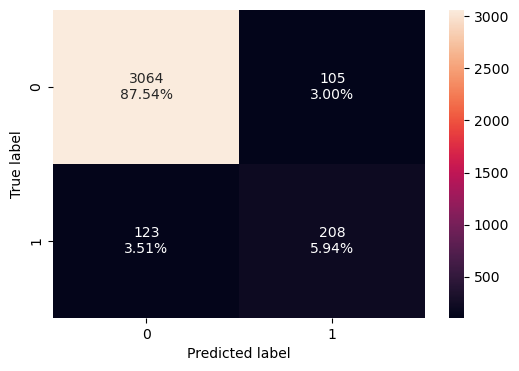

In [125]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [126]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.934857,0.628399,0.664537,0.645963


* Recall has improved as compared to the initial model.
* Model has given a balanced performance, if the bank wishes to maintain a balance between recall and precision this model can be used

## Let's check the performance on the test set

* Using model with default threshold

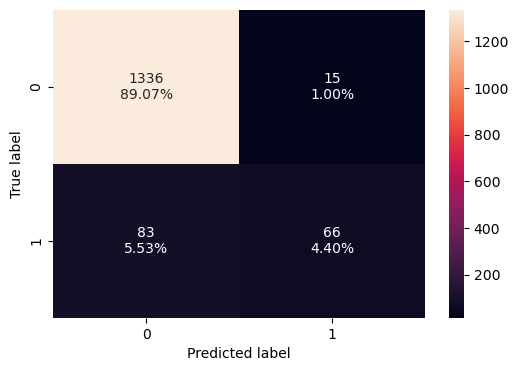

In [127]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [128]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.934667,0.442953,0.814815,0.573913


### ROC curve on test set

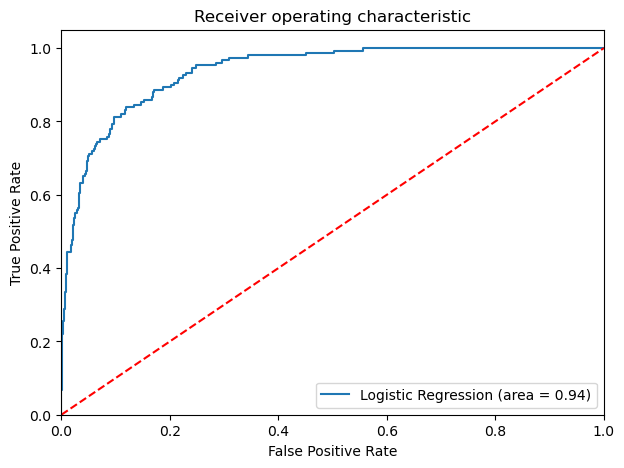

In [129]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Using model with threshold=0.11

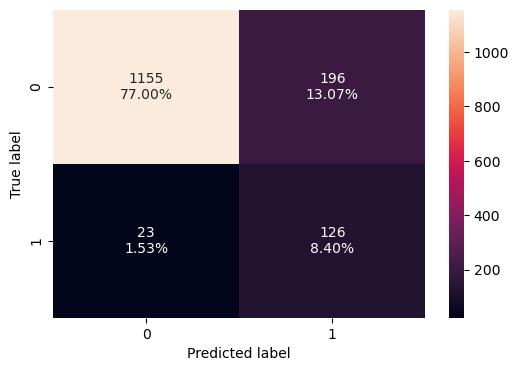

In [130]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [131]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.854,0.845638,0.391304,0.535032


### Using model with threshold = 0.34

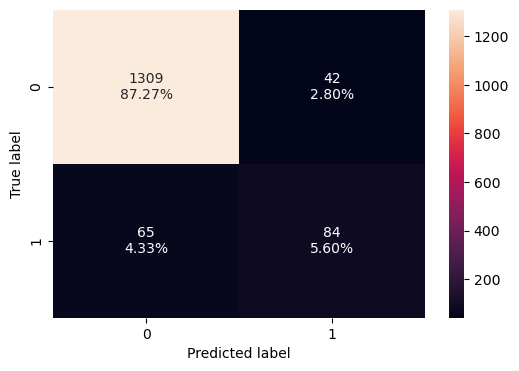

In [132]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [133]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.928667,0.563758,0.666667,0.610909


## Model performance summary

In [135]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.34 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.11 Threshold,Logistic Regression-0.34 Threshold
Accuracy,0.938857,0.869143,0.934857
Recall,0.492447,0.912387,0.628399
Precision,0.779904,0.413133,0.664537
F1,0.603704,0.568738,0.645963


In [136]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.34 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.11 Threshold,Logistic Regression-0.34 Threshold
Accuracy,0.934667,0.854000,0.928667
Recall,0.442953,0.845638,0.563758
Precision,0.814815,0.391304,0.666667
F1,0.573913,0.535032,0.610909


## Conclusion

* By changing the threshold of the logistic regression model we were able to see a significant improvement in the model performance.
* The logistic regression models are giving a generalized performance on training and test set.
* Using the model with default threshold the model will give a low recall but good precision score - This model will help the bank save resources but lose on potential customers.
* Using the model with 0.11 threshold the model will give a high recall but low precision score - This model will help the bank identify potential customers effectively but the cost of resources will be high.
* Using the model with 0.34 threshold the model will give a balance recall and precision score - This model will help the bank to maintain a balance in identifying potential customer and the cost of resources.

## Decision Tree

* let's create functions to calculate different metrics and confusion matrix

In [137]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [138]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Model

In [139]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Checking model performance on training set

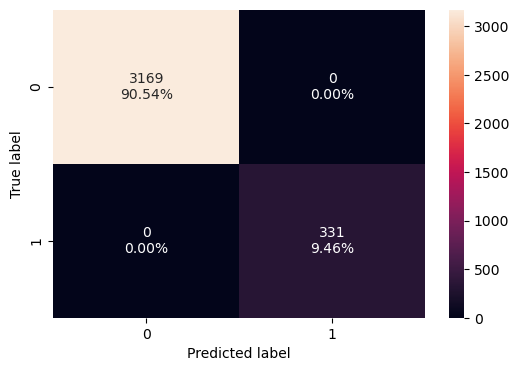

In [140]:
confusion_matrix_sklearn(model, X_train, y_train)

In [141]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model has performed very well on training set.

## Visualizing the Decision Tree

In [142]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96']


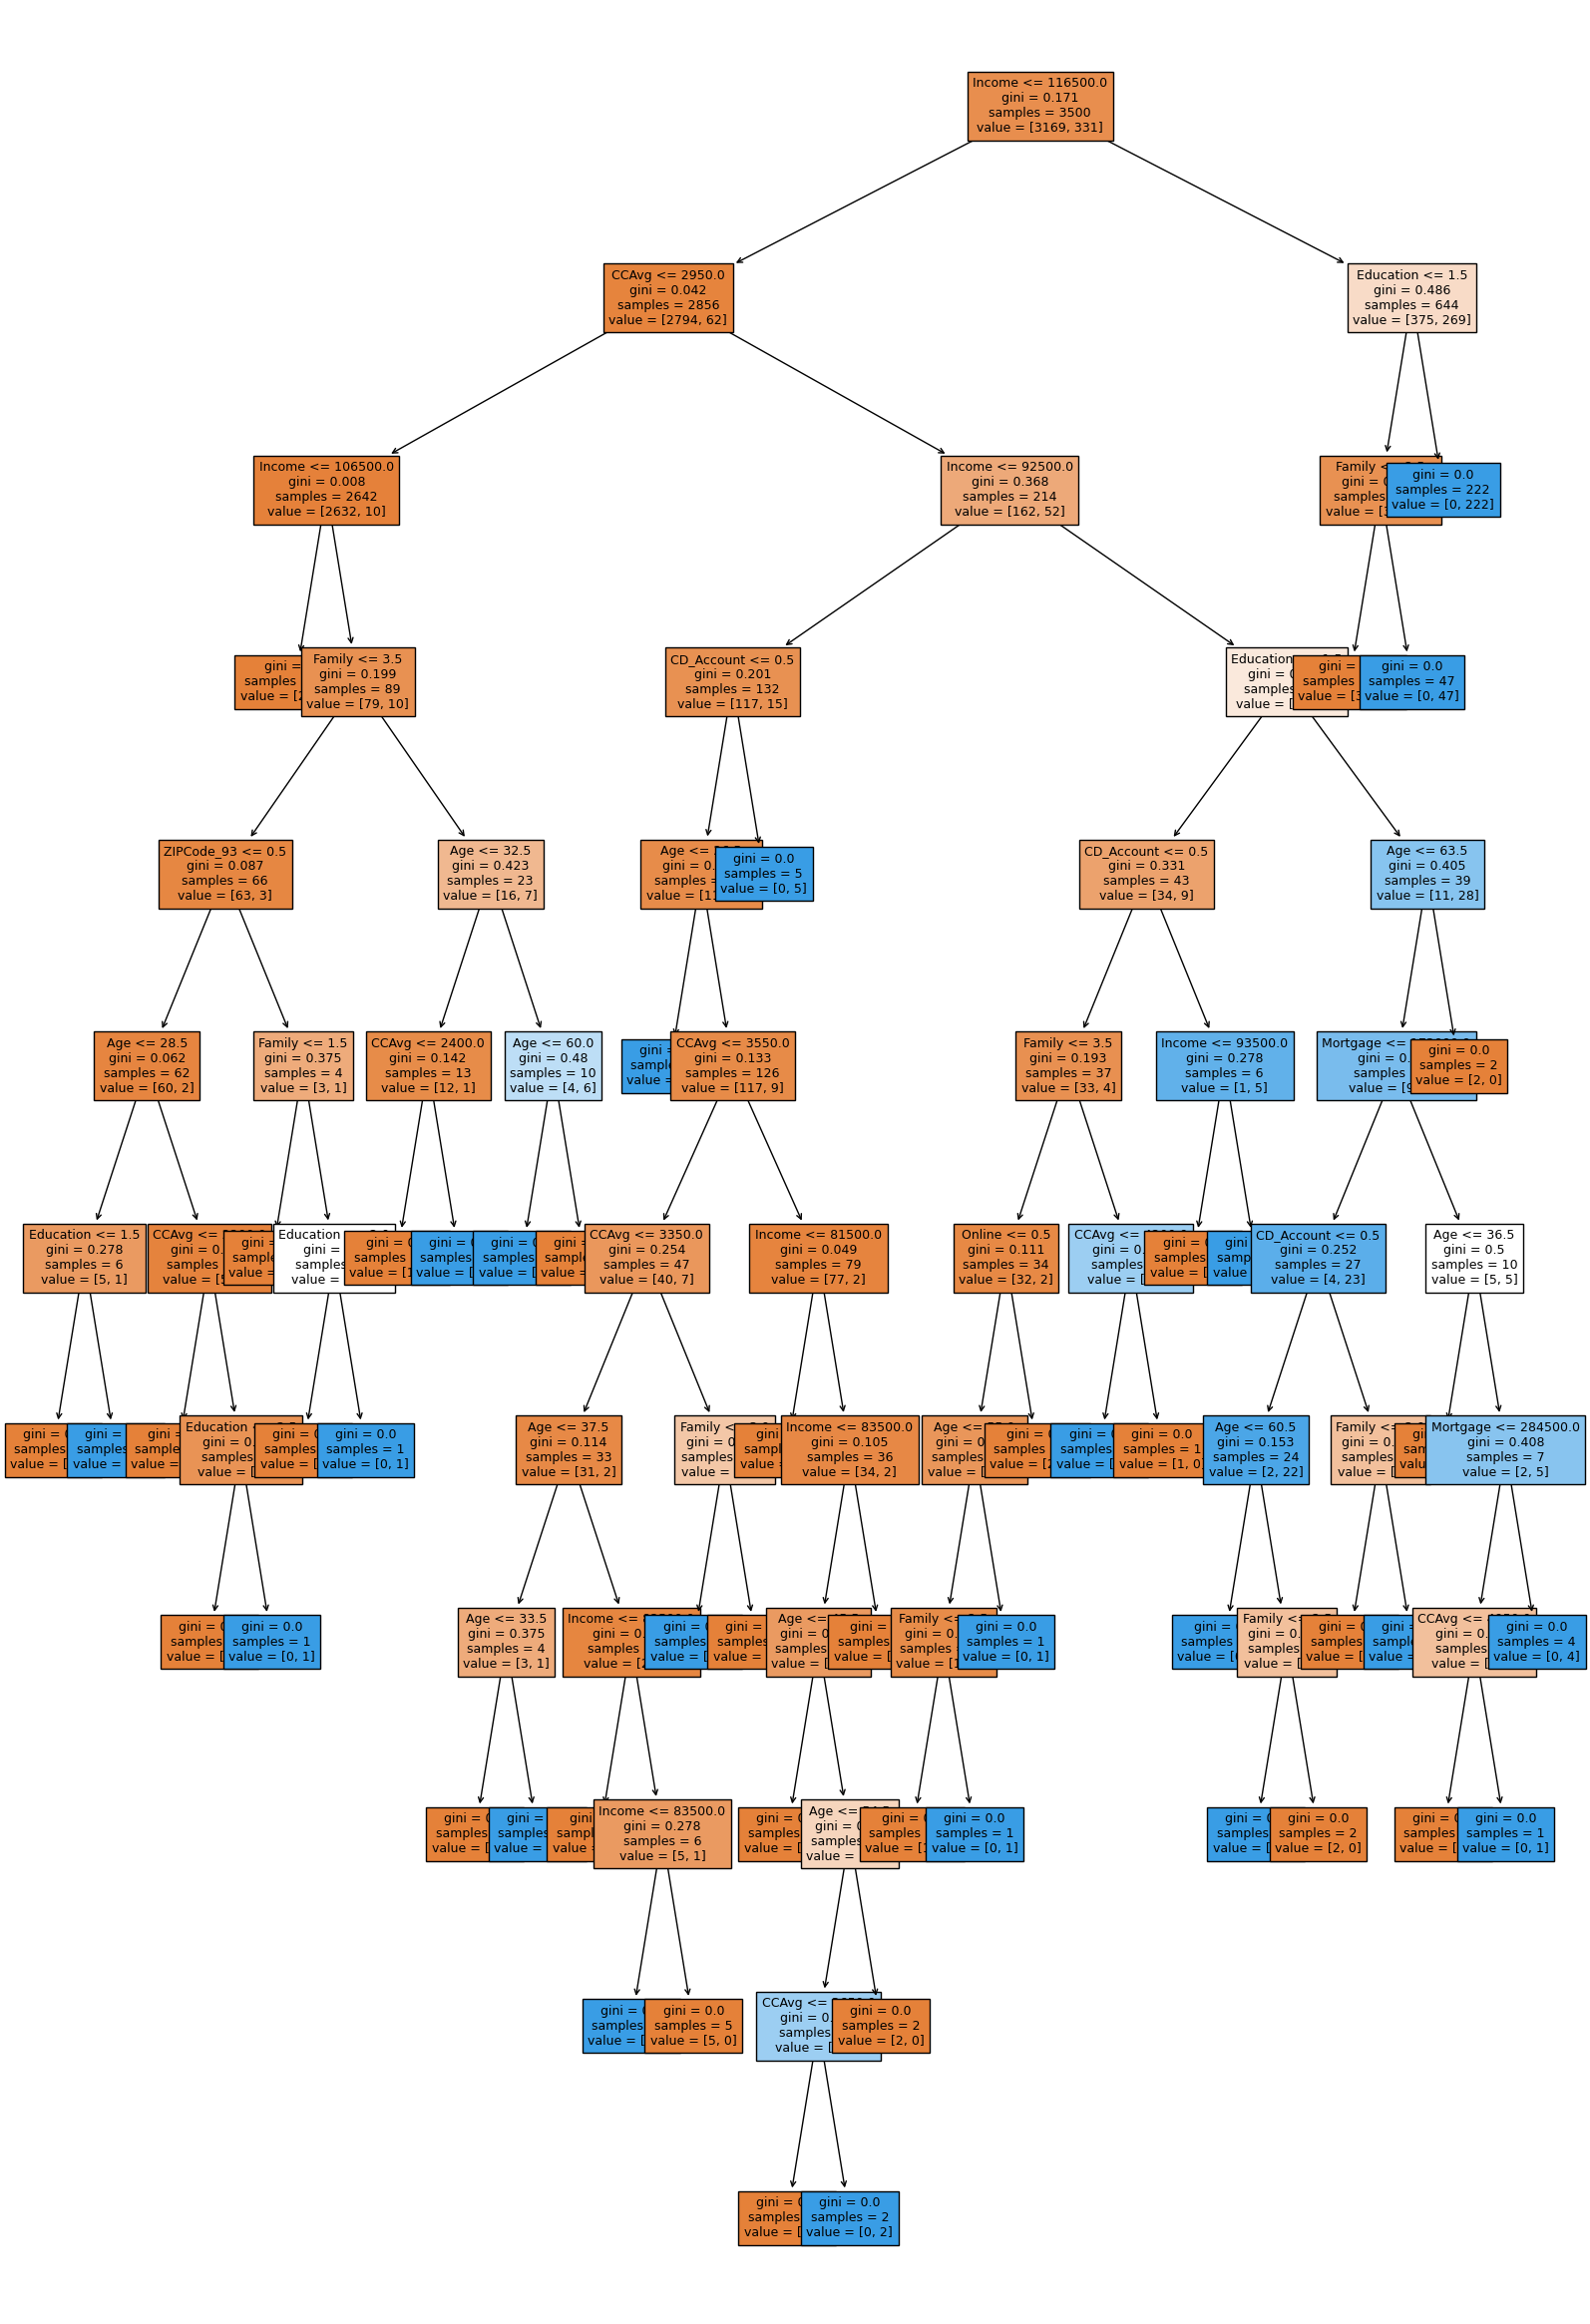

In [143]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [144]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116500.00
|   |--- CCAvg <= 2950.00
|   |   |--- Income <= 106500.00
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106500.00
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2200.00
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2200.00
|   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Fa

In [145]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.408320
Income              0.304761
Family              0.165660
CCAvg               0.052294
Age                 0.036541
CD_Account          0.025711
Mortgage            0.005557
ZIPCode_93          0.000594
Online              0.000561
Securities_Account  0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000


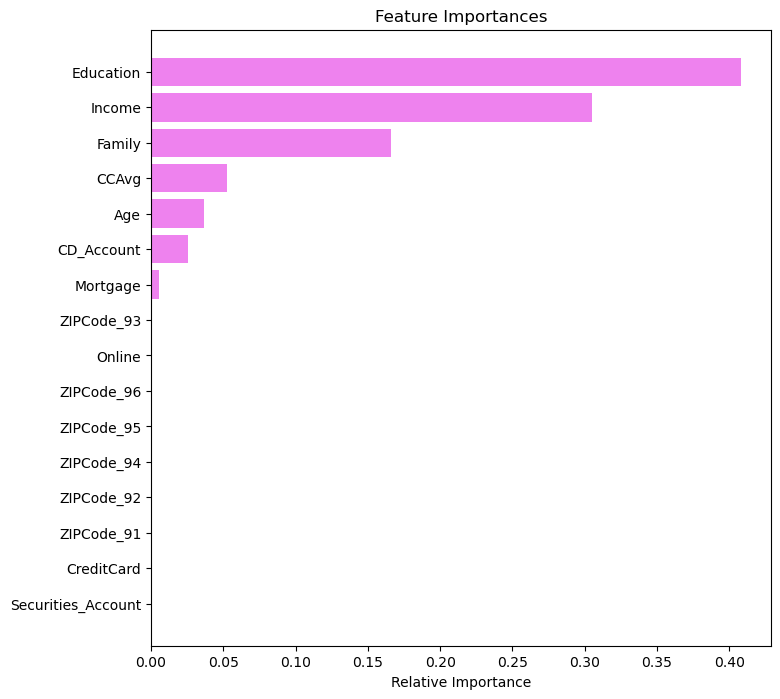

In [146]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Education is the most important feature followed by income and family.
* The tree above is very complex and difficult to interpret.

## Model Improvement

### Pre-Pruning

In [147]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

## Checking performance on training set

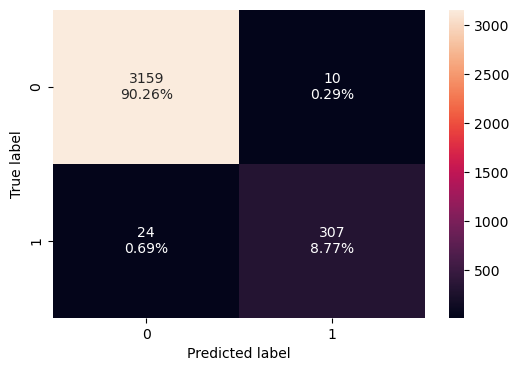

In [148]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [149]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


## Visualizing the Decision Tree

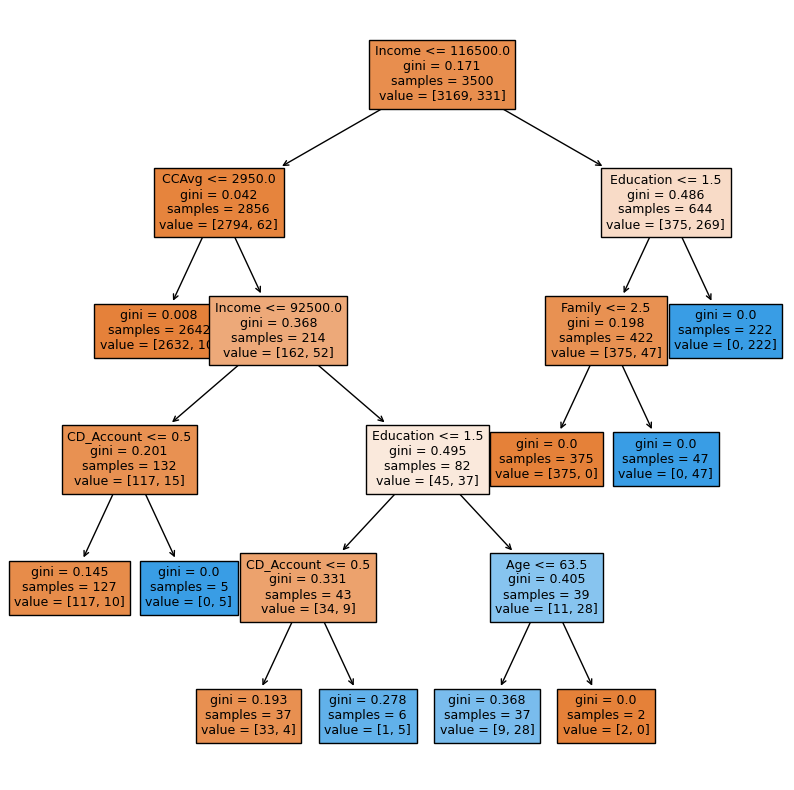

In [150]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [151]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116500.00
|   |--- CCAvg <= 2950.00
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2950.00
|   |   |--- Income <= 92500.00
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92500.00
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|--- Income >  116500.00
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.0

### Observations

* We can see that the tree has become simpler and more readable.

In [152]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.408320
Income              0.304761
Family              0.165660
CCAvg               0.052294
Age                 0.036541
CD_Account          0.025711
Mortgage            0.005557
ZIPCode_93          0.000594
Online              0.000561
Securities_Account  0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000


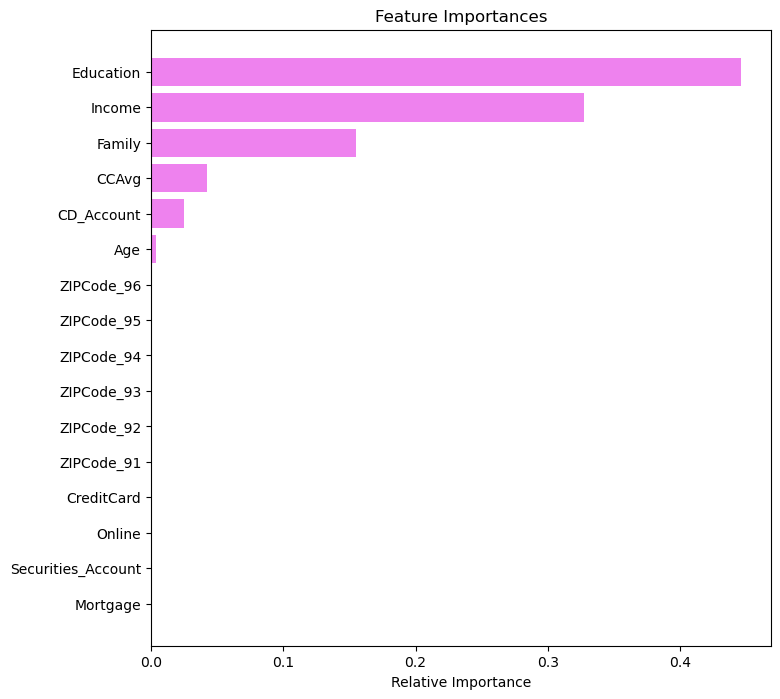

In [153]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Decision tree after pre-pruning has given similar feature importance and decision rules.

### Cost Complexity Pruning

In [154]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [155]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000214,0.000429
2,0.000223,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000381,0.006423


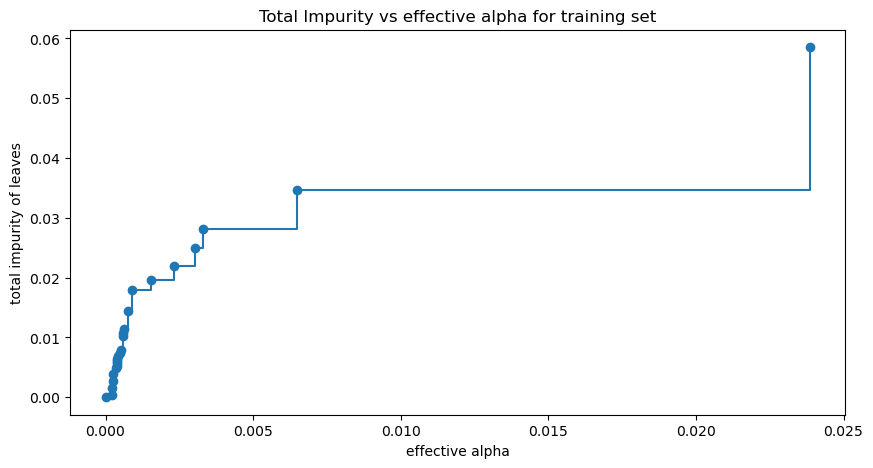

In [156]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [157]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

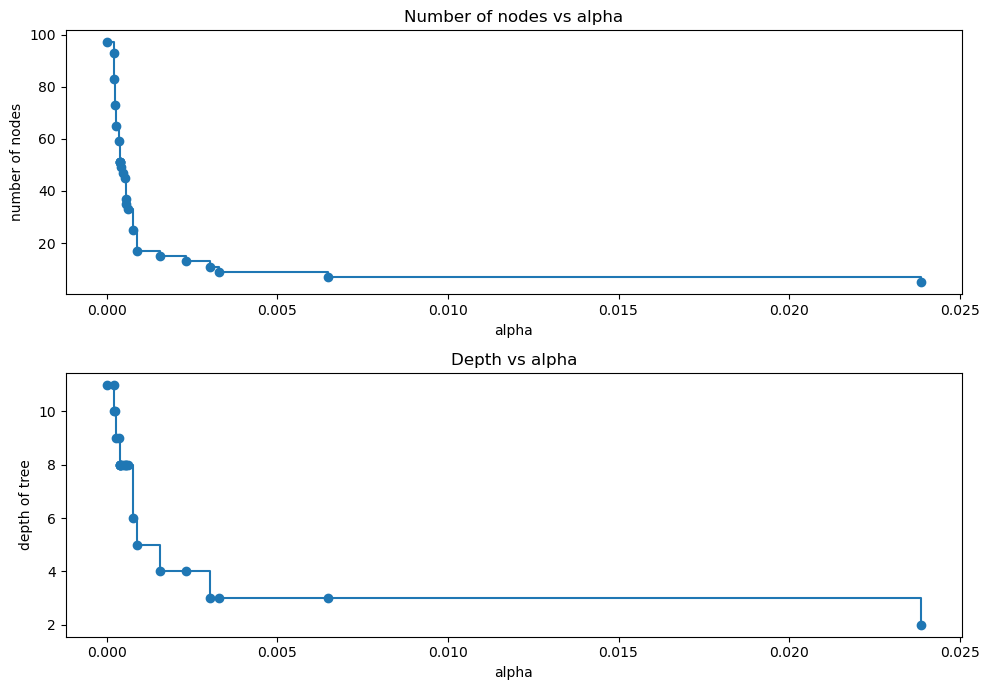

In [158]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Recall vs alpha for training and testing sets

In [159]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

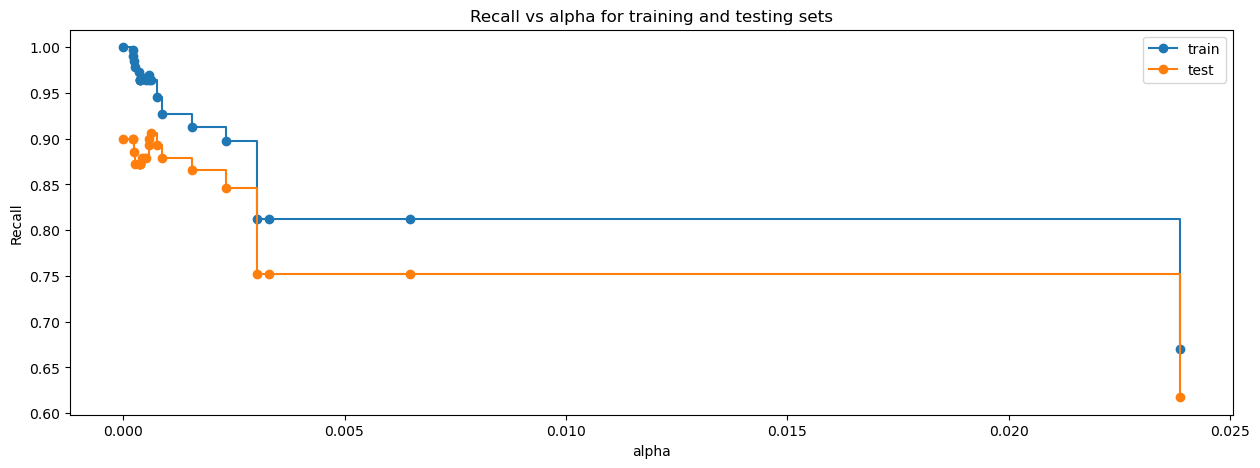

In [160]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [161]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


* Post-pruning using ccp alpha returns the same model as the initial model (Tree with no pruning).

## Let's check the performance on test set

### Using the decision tree with default parameters

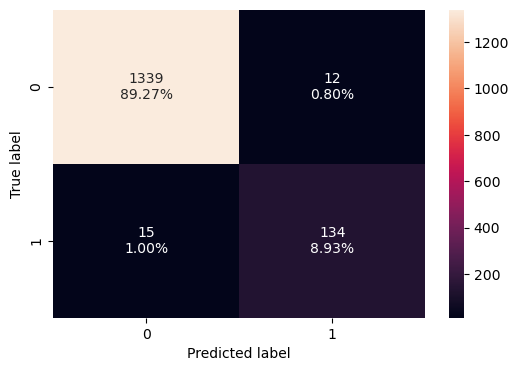

In [162]:
confusion_matrix_sklearn(model, X_test, y_test)

In [163]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.982,0.899329,0.917808,0.908475


### Using the hyperparameter tuned decision tree

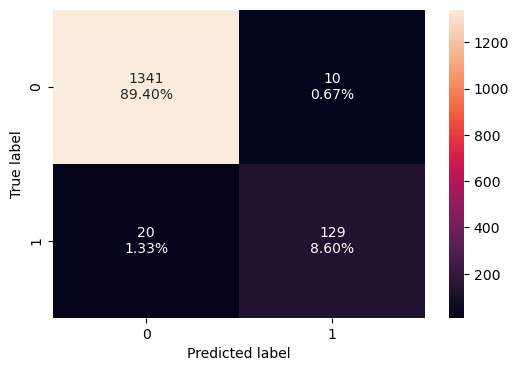

In [164]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [165]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


## Comparing Decision Tree models

In [166]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,1.0,0.990286
Recall,1.0,0.927492
Precision,1.0,0.968454
F1,1.0,0.947531


In [167]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,0.982000,0.980000
Recall,0.899329,0.865772
Precision,0.917808,0.928058
F1,0.908475,0.895833


## Conclusion

* Overall we can see that the Decision tree performs better on the dataset
* From the Two Models which is the decision tree and Logistic regression, The decision tree is performing better than that of the Logistic Regression.
* Looking at important variables based on Feature importance in Decision trees
* * Income, CCAvg, CD_Account, Family, Education are important
* Factors that have an impact on Personal_Loan: Income, Family, Education.
* Higher income customers should be the target customers for the bank - Customers who have income above 116k dollars and a family of more than 2, such customers have higher chances of taking personal loans.
* Higher education higher are the chances to take a loan - Customers who are more educated (education level greater than undergraduate) have a higher chance of taking a personal loan.
* Size of the family has a positive correlation with the personal loan, as the size of the family increases (generally a family size of 3 or more than 3 members) have more chances of a customer taking a personal loan.
